<a href="https://colab.research.google.com/github/sherbw28/class_deep/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasを使用したディープラーニングをやってみる
画像認識を行う

In [20]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

### 学習済みモデルの読み込み

In [21]:
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 5s 0us/step


### 画像判定のための関数

In [22]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top=featuresize)[0]
  return results

In [23]:
def showimg(filename,title,i):
  im = Image.open(filename)
  im_list = np.asarray(im)
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis('off')
  plt.imshow(im_list)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt

--2022-10-04 00:38:15--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9vcc10um436joopjqffghfb1i37cuq0r/1664843850000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=fe801f6f-9a14-4fc1-b3a8-d4b750942231 [following]
--2022-10-04 00:38:15--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9vcc10um436joopjqffghfb1i37cuq0r/1664843850000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=fe801f6f-9a14-4fc1-b3a8-d4b750942231
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 173.194.202

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 00:38:22--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9vcc10um436joopjqffghfb1i37cuq0r/1664843850000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=4e38f0ca-0795-4062-b72f-9673b64b6fe9 [following]
--2022-10-04 00:38:22--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9vcc10um436joopjqffghfb1i37cuq0r/1664843850000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=4e38f0ca-0795-4062-b72f-9673b64b6fe9
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 173.194.202

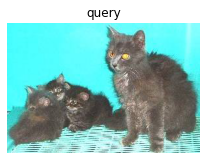

49152/35363 [=========================================] - 0s 0us/step
('n02105056', 'groenendael', 0.24618655)
('n02123394', 'Persian_cat', 0.17262845)
('n02106382', 'Bouvier_des_Flandres', 0.09002146)
('n03325584', 'feather_boa', 0.05190794)
('n02124075', 'Egyptian_cat', 0.048290268)
('n03598930', 'jigsaw_puzzle', 0.03581146)
('n02110627', 'affenpinscher', 0.034931336)
('n02097298', 'Scotch_terrier', 0.025723452)
('n02127052', 'lynx', 0.021893863)
('n02104365', 'schipperke', 0.02058028)


In [24]:
filename = 'cat.101.jpg'
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,'query', i+1)
plt.show()
results = predict(filename,10)
for result in results:
  print(result)

In [ ]:
filename = 'train/dog.8035.jpg'
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,'query', i+1)
plt.show()
results = predict(filename,10)
for result in results:
  print(result)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dir_path = '/content/drive/My Drive/2022LATE'
os.makedirs(dir_path, exist_ok=True)
!pwd

/content


In [ ]:
!cp '/content/drive/My Drive/2022LATE/train.zip'

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


In [16]:
!unisip -o -q 'train.zip'
print("zip解凍完了")

/bin/bash: unisip: command not found
zip解凍完了


In [17]:
pwd

'/content'